# 2020.07.31 머신러닝 알고리즘 스터디
# FP-Growth Algorithm
# FP 성장 알고리즘

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Load images

In [2]:
from PIL import Image
im1 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/01.JPG")
im2 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/02.JPG")
im3 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/03.JPG")
im4 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/04.JPG")
im5 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/05.JPG")
im6 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/06.JPG")
im7 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/07.JPG")
im8 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/08.JPG")
im9 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/09.JPG")
im10 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/10.JPG")
im11 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/11.JPG")
im12 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/12.JPG")
im13 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/13.JPG")
im14 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/14.JPG")
im15 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/15.JPG")
im16 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/16.JPG")
im17 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/17.JPG")
im18 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/18.JPG")
im19 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/19.JPG")
im20 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/20.JPG")

## 1. 서론 : 연관규칙 학습 (Association Rule) or 장바구니 분석(Market Basket Analysis)

- 대형 데이터베이스에서 변수 간의 흥미로운 관계를 발견하기 위한 규칙-기반 비지도 기계 학습 방법.
- 마케팅 분야에서 상품 추천(recommendation)을 위해 많이 사용.

### 상품 추천의 종류

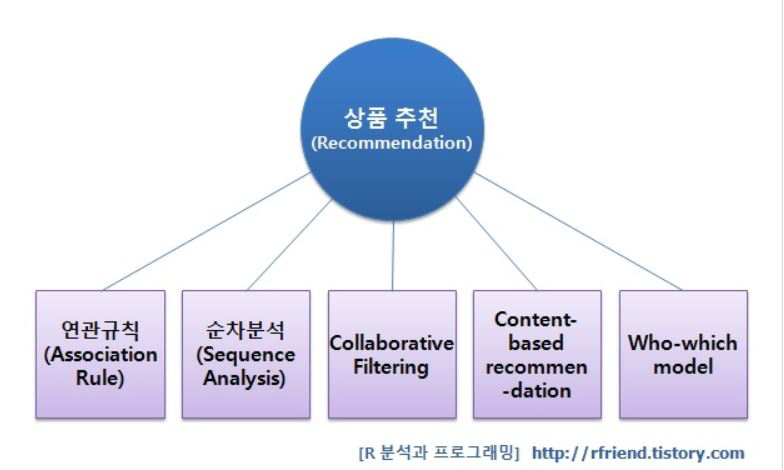

In [ ]:
im1

- 연관규칙분석(Association Rule Analysis) : 고객의 대규모 거래 데이터로부터 함께 구매가 발생하는 규칙을 도출하여, 고객이 특정 상품 구매 시 연관도 높은 상품 추천.
- 순차분석(Sequence Analysis) : 고객의 시간 흐름에 따른 구매 패턴을 도출하여, 고객이 특정 상품 구매 시 일정 시간 후 적시에 상품 추천.
- Collaborative Filtering : 추천 대상이 되는 고객 A 와 다른 고객 B에 대해 상관계수를 비교해, 서로 높은 상관이 인정되는 경우 고객 B 가 구입 완료한 상품 중에 고객 A가 미구입한 상품을 추천.(유사 고객을 찾는 것과 비슷)
- Contents-based recommendation : 과거에 구매했던 상품들의 속성과 유사한 다른 상품 아이템 중 미구매 상품 추천.
- Who-Which modeling : 특정 상품(군)을 추천하는 모형 개발하여 구매 가능성 높은 고객(군) 대상 상품 추천

### 상품 추천의 효용성

- Netflix : 대여되는 영화의 2/3가 추천을 통해 발생.<br>
이용자들이 동영상에 매긴 별점, 위치정보, 기기정보, 플레이버튼 수, 평일과 주말에 따른 선호 프로그램, 소셜 미디어 내에서 언급된 횟수 등을 분석해 알고리즘을 개발했다.
- Google News : 38% 이상이 추천을 통해 조회 발생. 
- Amazon : 35% 이상이 추천을 통한 판매. <br><br>
* 출처 : 넷플릭스의 빅데이터, 인문학적 상상력과의 접점, 조영신, KISDI 동향 Focus 

### 연관규칙 분석

- 특정 사건이 발생했을 때, 함께 빈번하게 발생하는 또 다른 사건의 규칙
- Item set(항목 집합) : 전체 Item 중에서 가능한 부분 집합.
- The set of Item sets(항목 집합의 집합) : Item의 부분집합들로 구성된 집합.
- 특정 Item set이 발생했을 때 또 다른 Item set이 발생하는 규칙. <br><br>

- 예를 들어, [남성, 금요일, 맥주] ----> [기저귀]
: 금요일에 맥주를 사는 남성 고객은 기저귀도 같이 산다.

### 연관규칙 분석의 척도

#### 지지도(Support) <br>
조건절(A)이 얼어날 확률. 규칙을 얼마나 자주 적용할 수 있나?

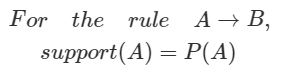

In [ ]:
im2

#### 신뢰도(Confidence)
조건절(A)이 주어졌을 때, 결과절(B)이 일어날 조건부확률. 아이템 집합 간의 연관성 강도를 측정.

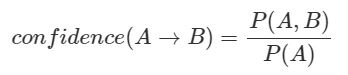

In [ ]:
im3

#### 향상도(lift)
생선된 규칙이 실제 효용가치가 있는지 판별. <br>
향상도가 1이라면, 조건절과 결과절은 서로 독립임을 의미한다. 따라서 이는 연관성이 없다는 것을 의미한다. <br>
향성도가 2라면, 두 사건이 독립이라는 걸 가정했을 때, 2배로 긍정적인 연관관계를 나타낸다.

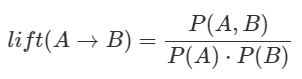

In [ ]:
im4

지지도, 신뢰도, 향상도가 모두 클 때, 규칙1 이 규칙2 보다 효과적인 규칙이라고 결론을 내릴 수 있다.

#### 활용 분야
- 마케팅 활동 (프로모션 가격 또는 제품 배치)
- 웹 사용 마이닝
- 침입탐지
- 연속 생산 및 생물 정보학
- 암 데이터 분석에서 단백질 서열과 자주 발견되는 DNA 패턴
- 증상과 질병 간의 상관관계

#### 예시 알고리즘
- Apriori
- FP-Growth
- Eclat

## 2. FP-Growth Algorithm

### 2-1. 기존의 한계점

- 연관규칙 학습을 위해서는 각 item 들이 각 itemset 안에서 어떤 빈도로 출현했는지, 어떤 item과 함께 나왔는지를 세는 것이 필수적이다.
- 하지만 데이터셋이 클 경우, 모든 후보 itemset들에 대해 하나하나 검사하는 것은 비효율적.

### 2-2. FP-Tree 만들기

- FP-Tree 를 만듬으로써, 우리는 기존의 데이터셋을 모두 찾아보면서 찾아야했던 frequent itemset들을 FP-Tree 하나에서만 찾을 수 있다.

다음과 같은 데이터 셋이 있다고 가정하자. <br>
- 초장만 산 사람이 9명
- 과메기만 산 사람이 40명
- 과메기와 김을 함께 산 사람이 50명
- 과메기,김,초장을 같이 산 사람이 1명

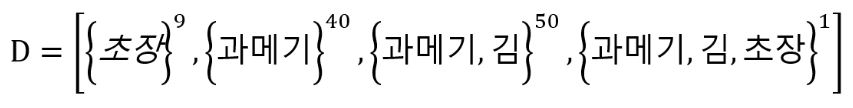

In [ ]:
im5

#### 1. 모든 각각의 item 들에 대해 전체 데이터셋에서 나온 빈도를 계산한다.
- 초장: 10번
- 과메기: 91번
- 김: 51번

#### 2. itemset 하나씩 tree에 더함으로써, tree를 만들어준다.
맨 처음, 0 node 하나를 만든다.

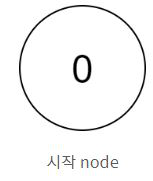

In [ ]:
im6

instance를 하나씩 더해주면서 tree를 만들어간다. 이 때, 빈도가 높은 item이 더 0에 가까운 node가 된다. <br>
예를 들어, [과메기, 김] itemset으로 tree를 만든다.

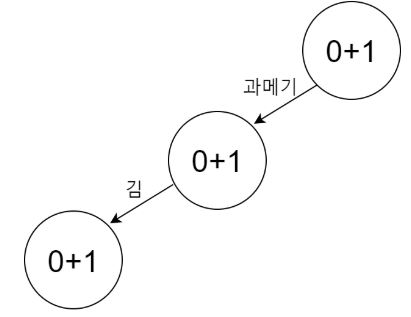

In [ ]:
im7

[과메기,김,초장] itemset을 추가한다.

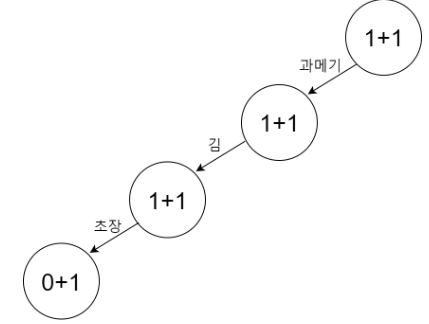

In [ ]:
im8

[초장] itemset 추가

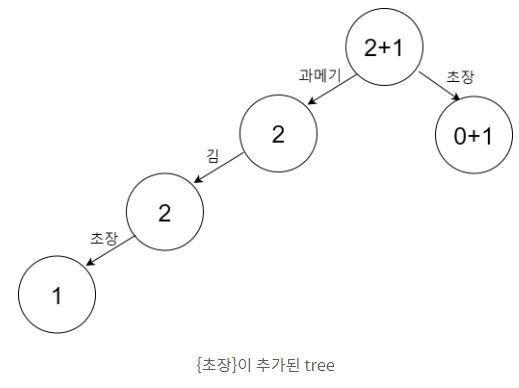

In [ ]:
im9

해당 방식을 활용하여 모든 itemset에 대해 tree를 만들 수 있다. 그러면 최종적으로 다음과 같은 FP-tree를 얻을 수 있다.

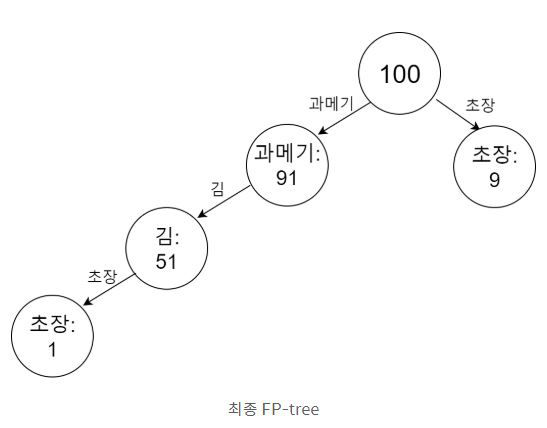

In [ ]:
im10

FP-Tree를 활용하면, support(지지도) 값을 구할 수 있다.

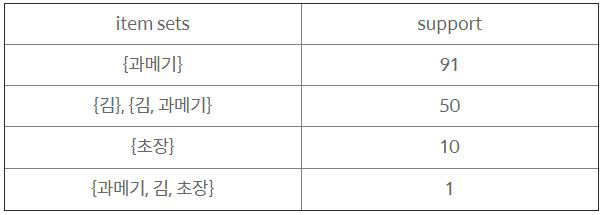

In [ ]:
im11

### 2-3. Mine FP-Tree : 복잡한 데이터일 때 FP-Tree 만들기

다음과 같은 좀 더 복잡한 데이터셋이 있다고 가정하자.

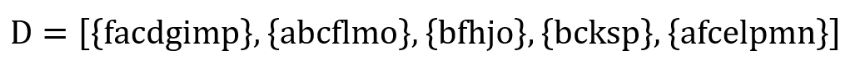

In [ ]:
im12

#### 1. frequncy를 이용해 infrequent item을 필터링한다.
각 아이템의 frequency 를 계산하면 다음과 같다. <br><br>

|Item | Frequncey |
|---|---:|
|f,c |4|
|a,b,m,p|3|
|I,o|2|
|d,e,g,i,j,h,k,n,s|1|



<br><br>우리는 frequency가 3 이상인 아이템들만 고려한다고 가정한다. <br>
즉, 우리가 원하는 minimum supprot가 3이다. <br><br>

|Item | Frequncey |
|---|---:|
|f,c |4|
|a,b,m,p|3|


<br><br> infrequent item 들을 제거하고 만든 itemset은 다음과 같다.


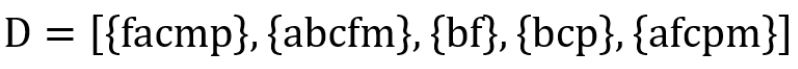

In [ ]:
im13

#### 2. Filtered Dataset을 이용해 FP-Tree를 만든다.
새로운 데이터셋을 이용해 FP-Tree를 만들어준다.

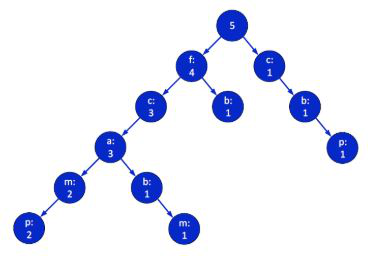

In [ ]:
im14

#### 3. Frequent item 들을 각각 postfix로 놓고 각 item 별로 recursive하게 support 를 구한다.
frequent item 인 f, c, a, b, m, p 중 p를 살펴보자. <br>
p가 포함되어 있는 FP-Tree 만 남긴다.

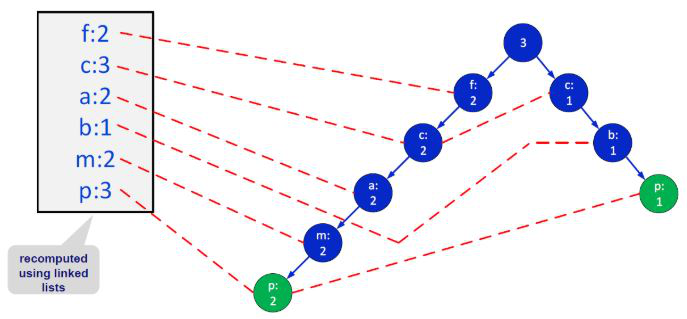

In [ ]:
im15

minimum support 는 3이기 때문에, 이를 만족하는 item은 p,c 밖에 없다.

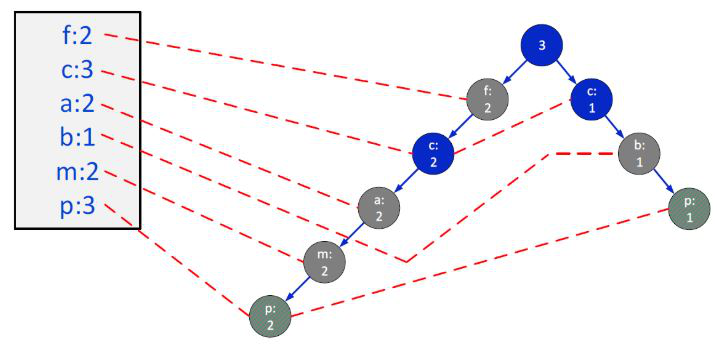

In [ ]:
im16

우리는 최종적으로 다음과 같은 FP-Tree를 얻게 되고, {p,c} itemset은 support가 3이 되므로 조건을 만족한다.

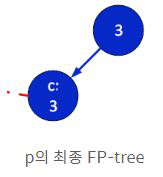

In [ ]:
im17

다음으로 m을 살펴보자. <br>
FP-Tree 중 m이 포함되는 tree 가지만 남긴다.

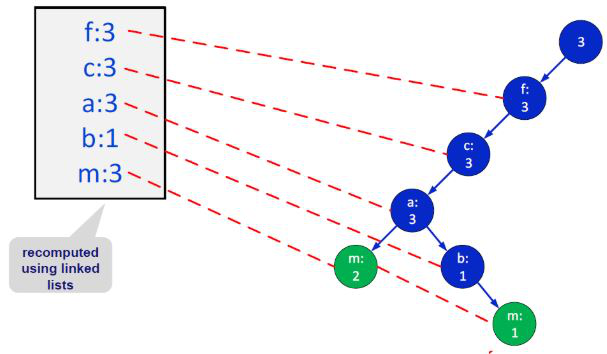

In [ ]:
im18

minimum support는 3이기 때문에, 이를 만족하는 item은 m, f, c, a 가 된다.

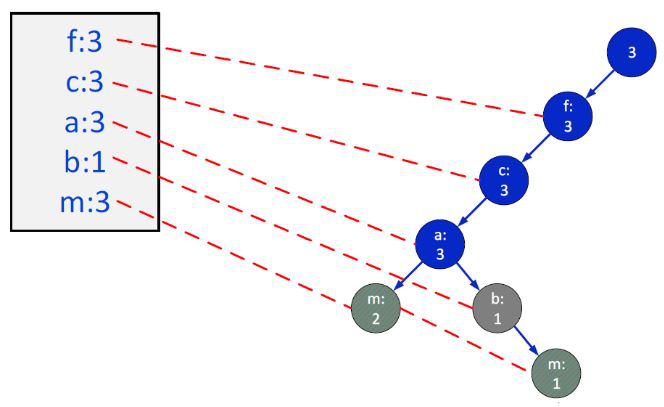

In [ ]:
im19

최종적으로 우리는 파란색과 같은 FP-Tree를 얻게 된다. <br> Recursion을 통해 구해보면, {m,f}, {m,c}, {m,a}, {m,c,a}, {m,f,c}, {m,f,a}, {m,a,c,f} itemset의 support가 3이 된다. <br>
모든 과정에 대한 결과는 다음과 같다.

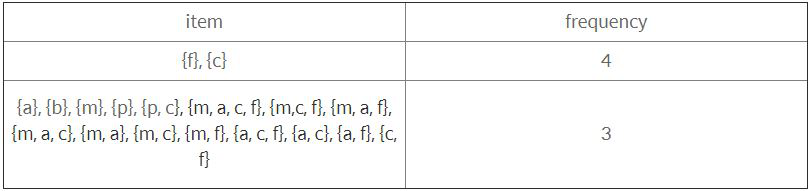

In [ ]:
im20

## 3. 장점 및 단점, 특징

### 장점
FP-Tree만 만들면 된다. -> 매우 빠르고 메모리에 무리 적음.

## Reference
- https://rfriend.tistory.com/190 <br>
- https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/ <br>
- https://process-mining.tistory.com/92 <br>